# Sobre o algoritmo

O intuito desse jupyter notebook é desenvolver o algoritmo de rank de grafo, tendo como base o algoritmo PageRank de Stanford, criado por Larry Page, co-fundador da Google, muito utilizado para ranquear as páginas mais relevantes da Web pelos hiperlink conectados.

----------------
Bibliotecas utilizadas

In [822]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

-----------------------
Criando grafo com arestas direcionadas

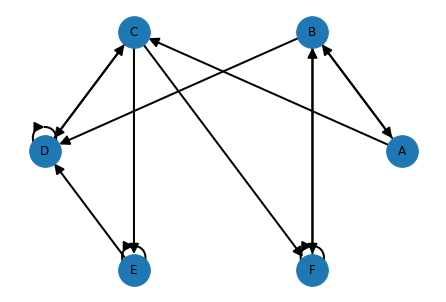

In [823]:
def create_graph(nodes, edges):
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(chr(i+65))
    
    for i in range(edges):
        G.add_edge(chr(random.randint(65, nodes+64)), chr(random.randint(65, nodes+64)))

    return G

G = create_graph(6, 15)

options = {
    'arrowsize': 20,
    'width': 2,
    'arrowstyle': '-|>'
}

pos = nx.circular_layout(G, scale=1)
nx.draw(G, pos, with_labels=True, **options, node_size=1000)
plt.show()


----------------
Criando matriz de adjacências para melhor visualização do grafo

[[0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1.]]


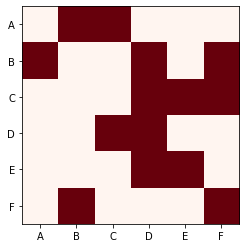

In [824]:
matriz = nx.to_numpy_matrix(G)
print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------

Calculo de ranqueamento dos nós:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [825]:
def rank_to_page(matriz, page_rank):
    N = len(matriz)
    D = .85
    
    matriz_prob = np.zeros((N, N))

    for i in range(len(matriz)):
        for j in range(N):
            if np.sum(matriz[i,:]) == 0:
                matriz_prob[i,j] = 1 / N
            else: 
                matriz_prob[i,j] = matriz[i,j] / np.sum(matriz[i,:])
    
    for i in range(N):
        for j in range(N):
            matriz_prob[i,j] = (1 - D) / N + D * matriz_prob[i,j]

    pr_next = np.zeros(N)
    for i in range(N):
        for j in range(N):
            pr_next[i] += matriz_prob[j,i] * page_rank[j]
    
    return pr_next


[0.07222222 0.16666667 0.16666667 0.26111111 0.14305556 0.19027778]


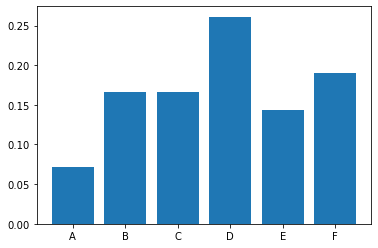

In [826]:

page_rank = np.array([1/len(matriz) for i in range(len(matriz))])
rank_nodes = rank_to_page(matriz, page_rank)
print(rank_nodes)

plt.bar(range(len(rank_nodes)), rank_nodes)
plt.xticks(range(len(rank_nodes)), list(G.nodes()))
plt.show()




----------------
Tabela iterativa de ranqueamento de nós

In [838]:
tabela_ranque = np.column_stack((list(G.nodes()), rank_nodes))
print(tabela_ranque)

for i in range(5):
    temp = rank_to_page(matriz, tabela_ranque[:,i])
    tabela_ranque = np.column_stack(tabela_ranque, temp)

[['A' '0.07222222222222222']
 ['B' '0.16666666666666666']
 ['C' '0.16666666666666669']
 ['D' '0.26111111111111107']
 ['E' '0.14305555555555557']
 ['F' '0.19027777777777777']]


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

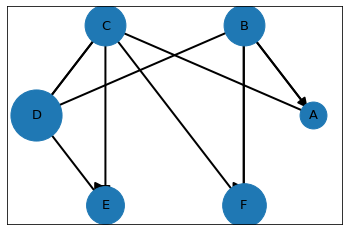

In [828]:
pos = nx.circular_layout(G, scale=1)

for i in range(len(rank_nodes)):
    nx.draw_networkx_nodes(G, pos, nodelist=[chr(i+65)], node_size=rank_nodes[i] * 10000)

nx.draw_networkx_edges(G, pos, **options, alpha=1)
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif')
plt.show()

----------------

## Referências de estudos:

Algoritmo e cálculo para relevância do nó no grafo -
<a>https://pt.wikipedia.org/wiki/PageRank</a>

Biblioteca de grafos -
<a>https://networkx.org/documentation/stable/developer/index.html</a>

Cadeias de Markov -
<a>https://pt.wikipedia.org/wiki/Cadeias_de_Markov</a>